In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df=pd.read_csv('cleaned_train_loan_data.csv')
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,1.0,2,1


<Axes: >

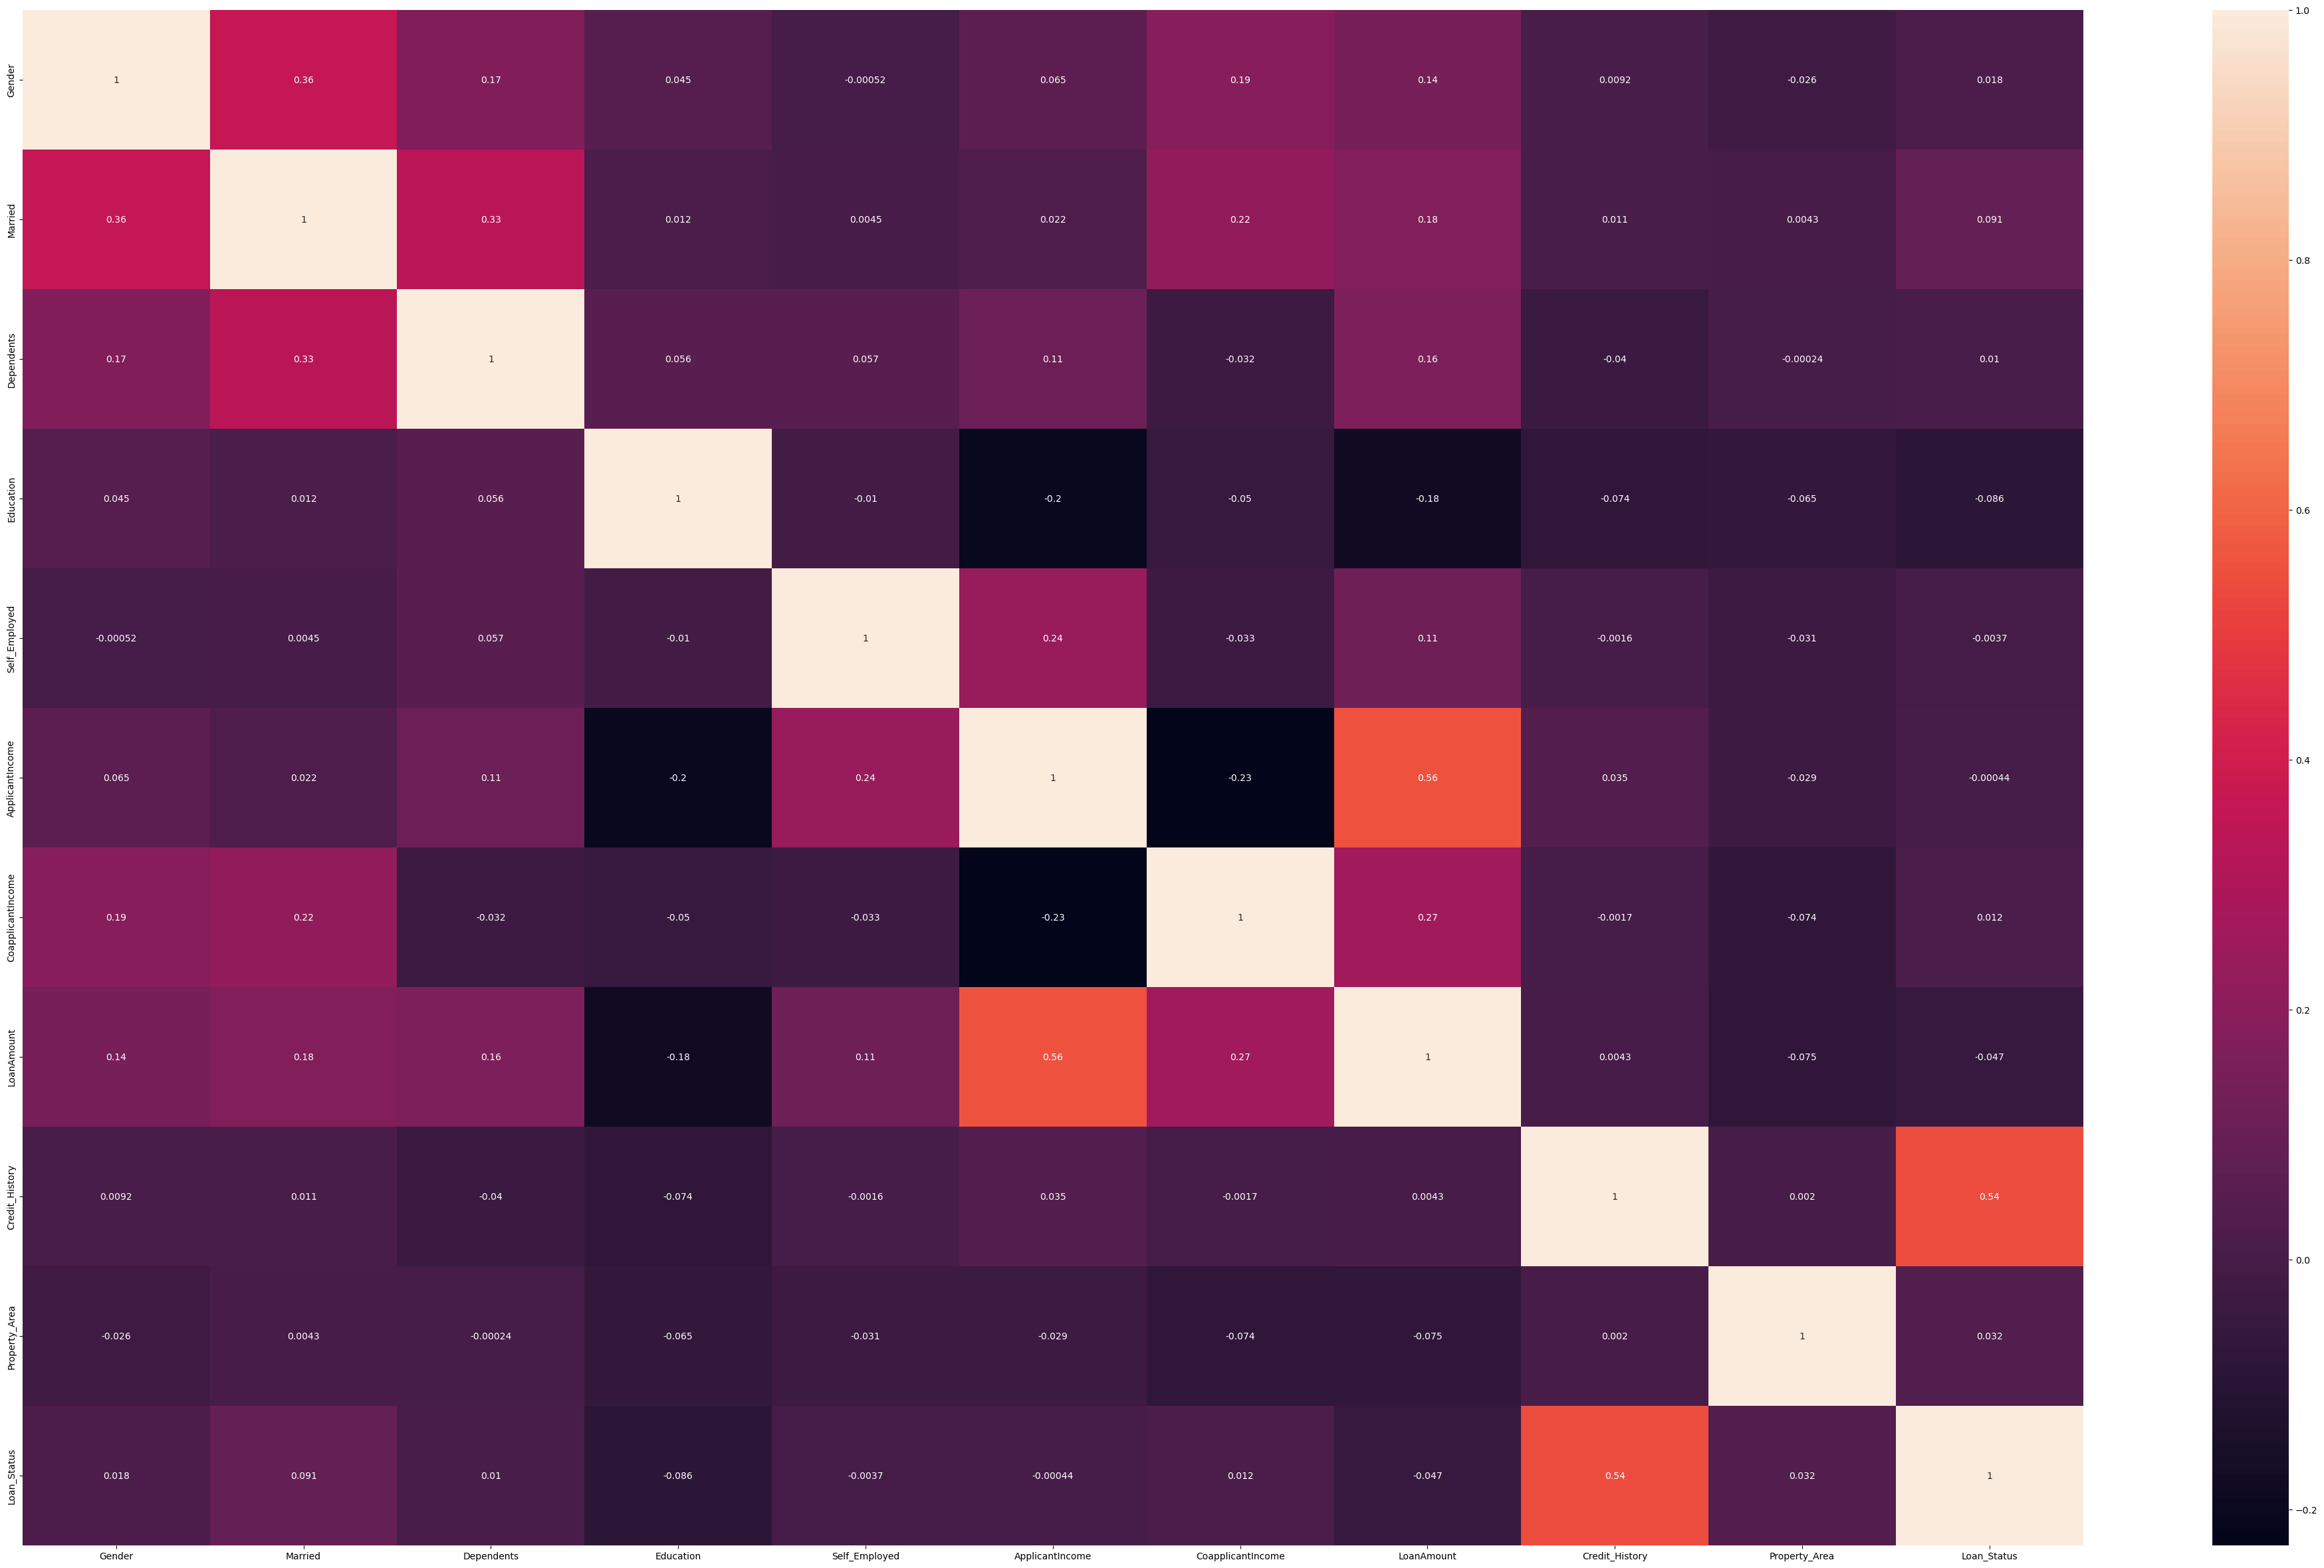

In [3]:
plt.figure(figsize=(50,30))
sns.heatmap(loan_df.corr(),annot=True)

In [4]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
loan_df.shape

(614, 11)

**Train test split**

In [6]:
X=loan_df.drop('Loan_Status',axis=1)
y=loan_df['Loan_Status']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [8]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(491, 10)
(123, 10)
(491,)
(123,)


In [13]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [14]:
y_predictions=LR.predict(X_test)

In [15]:
y_test[:5].values,y_predictions[:5]

(array([1, 0, 1, 0, 1], dtype=int64),
 array([0.81004871, 0.75918816, 0.71895086, 0.84935127, 0.86621429]))

In [16]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [18]:
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.26811559677240193
MSE: 0.14367748546407338
RMSE: 0.37904813080145033


In [19]:
import pickle
pickle.dump(LR,
            open('linear_loan_model.pkl','wb'))


In [20]:
model = pickle.load(open('linear_loan_model.pkl','rb'))
model

LinearRegression()

In [22]:
len(X_test.columns)

10

In [23]:
model.predict([[1,2,3,4,5,6,7,8,9,10]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.59285615])

In [24]:
model.predict(X_test)

array([ 0.81004871,  0.75918816,  0.71895086,  0.84935127,  0.86621429,
       -0.03216306,  0.8360385 ,  0.64842003,  0.0147476 ,  0.79434557,
        0.77562772,  0.84759149,  0.64381578,  0.75977556,  0.8848888 ,
        0.89743506,  0.61698078,  0.64245483,  0.78942634, -0.02599019,
        0.13354506,  0.77715617,  0.87765295,  0.84229879,  0.84391801,
        0.72223494,  0.69447851,  0.78298391,  0.15625417,  0.06743417,
        0.73830659,  0.72413521,  0.78238874,  0.76849762,  0.82137701,
       -0.02676081,  0.7529004 ,  0.63394368,  0.81463856,  0.7832379 ,
        0.80220348,  0.14942979,  0.95426592,  0.74231692,  0.77997331,
        0.71145632,  0.82632676,  0.75910036,  0.81172337,  0.71120079,
        0.83511972,  0.83194348,  0.71757602,  0.71704807,  0.77917083,
        0.70822575,  0.84643037,  0.64903003,  0.82678495,  0.7183733 ,
        0.04027701,  0.7086688 ,  0.74817433,  0.10050459,  0.85254912,
        0.75080192,  0.77472236,  0.71935291,  0.73477494,  0.69